# SVC: Истина - в вине

Мы выступим в роли программиста-сомелье: нам предстоит определять качество вина. Необходимо решить задачу классификации с использованием SVM и подобрать наилучшее ядро.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Датасет содержит информацию о красных винах и их составе.
# Целевой переменной является столбец "quality".
# Это метрика качества вина по шкале от 3 до 8.

wine = pd.read_csv('winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Проанализируйте распределения переменных и корреляцию с таргетом.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

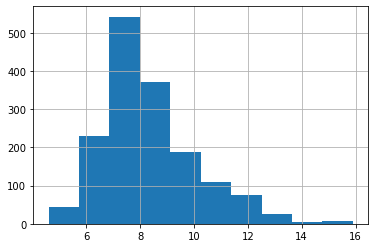

In [5]:
wine['fixed acidity'].hist()

<AxesSubplot:>

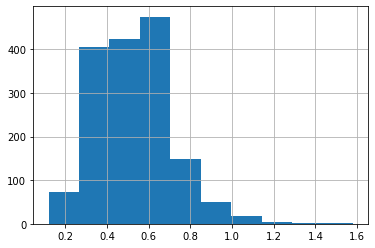

In [6]:
wine['volatile acidity'].hist()

<AxesSubplot:>

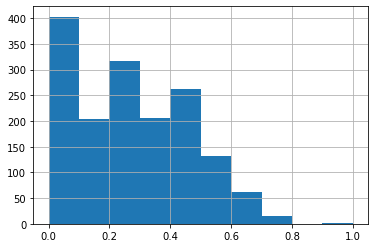

In [7]:
wine['citric acid'].hist()

<AxesSubplot:>

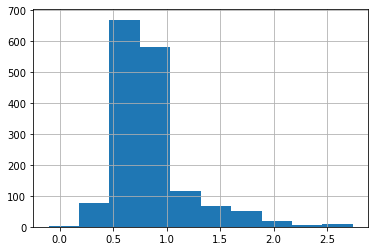

In [8]:
wine['residual sugar'] = wine['residual sugar'].apply(np.log)
wine['residual sugar'].hist()

<AxesSubplot:>

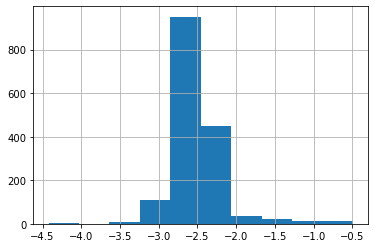

In [9]:
wine['chlorides'] = wine['chlorides'].apply(np.log)
wine['chlorides'].hist()

<AxesSubplot:>

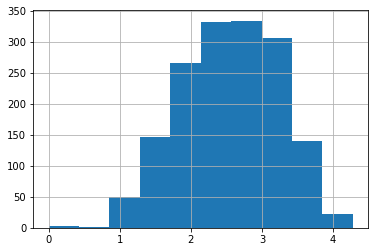

In [10]:
wine['free sulfur dioxide'] = wine['free sulfur dioxide'].apply(np.log)
wine['free sulfur dioxide'].hist()

<AxesSubplot:>

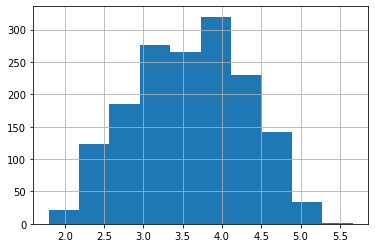

In [11]:
wine['total sulfur dioxide'] = wine['total sulfur dioxide'].apply(np.log)
wine['total sulfur dioxide'].hist()

<AxesSubplot:>

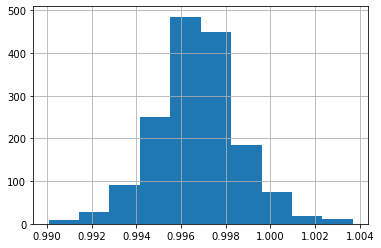

In [12]:
wine['density'].hist()

<AxesSubplot:>

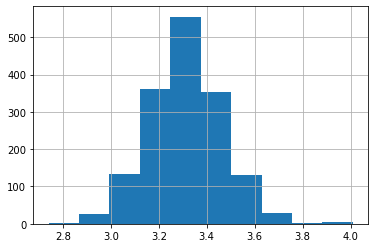

In [13]:
wine['pH'].hist()

<AxesSubplot:>

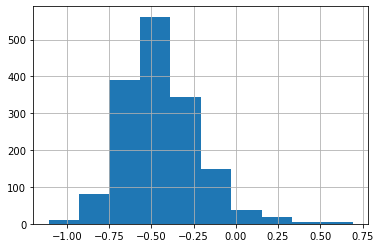

In [14]:
wine['sulphates'] = wine['sulphates'].apply(np.log)
wine['sulphates'].hist()

<AxesSubplot:>

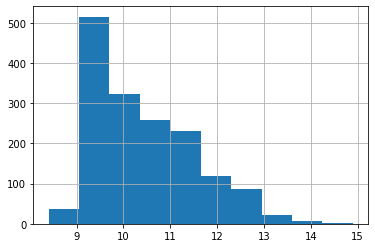

In [15]:
wine['alcohol'].hist()

<AxesSubplot:>

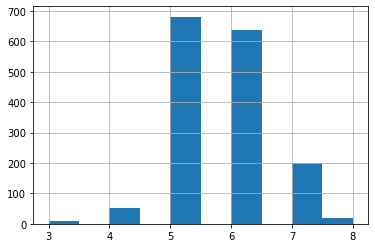

In [16]:
wine['quality'].hist()

In [17]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.174742,0.175191,-0.179211,-0.117900,0.668047,-0.682978,0.204294,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.024278,0.108726,0.016666,0.073407,0.022026,0.234937,-0.300549,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.172286,0.181780,-0.089146,-0.003637,0.364947,-0.541904,0.331516,0.109903,0.226373
residual sugar,0.174742,0.024278,0.172286,1.000000,0.117102,0.093839,0.152920,0.417538,-0.091241,0.024800,0.080569,0.023533
chlorides,0.175191,0.108726,0.181780,0.117102,1.000000,-0.013597,0.073285,0.351939,-0.283629,0.243076,-0.303961,-0.176140
free sulfur dioxide,-0.179211,0.016666,-0.089146,0.093839,-0.013597,1.000000,0.784622,-0.039642,0.095763,0.054068,-0.082672,-0.050087
total sulfur dioxide,-0.117900,0.073407,-0.003637,0.152920,0.073285,0.784622,1.000000,0.105539,-0.014837,0.052191,-0.230858,-0.170143
density,0.668047,0.022026,0.364947,0.417538,0.351939,-0.039642,0.105539,1.000000,-0.341699,0.166124,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091241,-0.283629,0.095763,-0.014837,-0.341699,1.000000,-0.154116,0.205633,-0.057731
sulphates,0.204294,-0.300549,0.331516,0.024800,0.243076,0.054068,0.052191,0.166124,-0.154116,1.000000,0.135156,0.308642


In [18]:
display(corr[np.abs(corr) > 0.6])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,-0.682978,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.784622,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.784622,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [19]:
# Сделайте целевую переменную категориальной
# ('bad wine': quality < 6.5 и 'good wine': quality > 6.5).
wine['quality'] = wine['quality'].apply(lambda x: 'bad' if x < 6.5 else 'good')
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [20]:
# Закодируйте целевую переменную.
wine["quality"] = wine["quality"].astype('category')
wine["quality"] = wine["quality"].cat.codes
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [21]:
X = wine.drop(['quality'], axis=1).values
y = wine['quality'].values

In [22]:
# Используйте StandardScaler() для преобразования признаков.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Настройте гиперпараметры модели SVC:
# C, gamma и kernel из ['linear', 'poly', 'rbf', 'sigmoid'].
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=C_range, gamma=gamma_range, kernel=kernel_range)

In [24]:
clf = SVC(random_state=42)

In [25]:
# Используйте метрику accuracy.
gs = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 1, 100.0], 'gamma': [0.1, 1, 10.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [26]:
gs.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
# Также можно смотреть результаты confusion matrix.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
# model with best_params_
clf = SVC(C=1.0, gamma=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

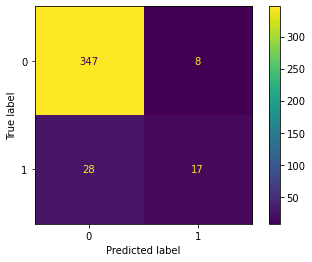

In [29]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [30]:
# Обучите модель с наилучшими параметрами и оцените score на кросс-валидации. 
cvs = cross_val_score(clf, X, y, cv=5)
print(cvs)
print(cvs.mean())

[0.878125   0.840625   0.909375   0.846875   0.86520376]
0.868040752351097
